# Introduction

This notebook loads the data from the R script (which contains the information from the surveys and demographics combined into a single table). Using this data, we try to cluster the employees based on their survey responses. The groups of employees are then analyzed based on their attrition rates and major differences in responses to questions between groups or high and low attrition. 


## Conclusion

**Differences are related to Non Monetary Topics such as Engagement and Career Opportunities**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import more
from more.scikit_helper.cluster import KMeansHelper as kmh

In [3]:
data = pd.read_csv("../data/data_combined.csv", encoding='latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18999 entries, 0 to 18998
Data columns (total 89 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   PersonID                                18999 non-null  object 
 1   Engagement Level                        18999 non-null  object 
 2   EN0330                                  18999 non-null  int64  
 3   EN0190                                  18999 non-null  int64  
 4   EN0012                                  18999 non-null  int64  
 5   EN0094                                  18999 non-null  int64  
 6   EN0027                                  18999 non-null  int64  
 7   EN0017                                  18999 non-null  int64  
 8   EN0002                                  18999 non-null  int64  
 9   EN0026                                  18999 non-null  int64  
 10  EN0248                                  18999 non-null  in

In [4]:
# Survey Responses
cols_to_keep_survey = data.columns[data.columns.str.startswith('EN', na=False)]
cols_to_keep_survey = cols_to_keep_survey.append(data.columns[data.columns.str.startswith('CU', na=False)])
cols_to_keep_survey.values

array(['EN0330', 'EN0190', 'EN0012', 'EN0094', 'EN0027', 'EN0017',
       'EN0002', 'EN0026', 'EN0248', 'EN0415', 'EN0036', 'EN0007',
       'EN0005', 'EN0066', 'EN0078', 'EN0015', 'EN0043', 'EN0028',
       'EN0103', 'EN0092', 'EN0247', 'EN0395', 'EN0199', 'EN0337',
       'EN0231', 'EN0001', 'EN0014', 'EN0193', 'EN0230', 'EN0319',
       'EN0187', 'EN0111', 'EN0081', 'EN0349', 'EN0006', 'EN0163',
       'EN0080', 'EN0232', 'EN0049', 'EN0053', 'EN0003', 'EN0075',
       'EN0024', 'EN0151', 'EN0397', 'EN0100', 'EN0004', 'EN0108',
       'EN0363', 'CU0001', 'CU0002', 'CU0003', 'CU0004', 'CU0005',
       'CU0006', 'CU0008', 'CU0009', 'CU0010', 'CU0011', 'CU0012'],
      dtype=object)

In [5]:
# Demographics
cols_to_keep_dem = [
    'State', 'Country', 'Exempt Status', 'Gender', 'RaceEthnicity', 'WFH',
    'PeopleLeader', 'SalesFunction', 'MgtLvlDetailed', 'HIPO', 'MgrChg1yr',
    'JobChg1yr', 'JobLvlChg1yr', 'Promoted1yr', 'Business Unit', 'Language'
]

col_output = ['VoluntaryAttrition']

In [6]:
cols_to_keep = cols_to_keep_survey.to_list() + col_output
add_dem_cols = False # False = Only use survey output as features, True = Survey Output + Selected Demographic Data
if add_dem_cols:
    cols_to_keep = cols_to_keep + cols_to_keep_dem
print(cols_to_keep)

['EN0330', 'EN0190', 'EN0012', 'EN0094', 'EN0027', 'EN0017', 'EN0002', 'EN0026', 'EN0248', 'EN0415', 'EN0036', 'EN0007', 'EN0005', 'EN0066', 'EN0078', 'EN0015', 'EN0043', 'EN0028', 'EN0103', 'EN0092', 'EN0247', 'EN0395', 'EN0199', 'EN0337', 'EN0231', 'EN0001', 'EN0014', 'EN0193', 'EN0230', 'EN0319', 'EN0187', 'EN0111', 'EN0081', 'EN0349', 'EN0006', 'EN0163', 'EN0080', 'EN0232', 'EN0049', 'EN0053', 'EN0003', 'EN0075', 'EN0024', 'EN0151', 'EN0397', 'EN0100', 'EN0004', 'EN0108', 'EN0363', 'CU0001', 'CU0002', 'CU0003', 'CU0004', 'CU0005', 'CU0006', 'CU0008', 'CU0009', 'CU0010', 'CU0011', 'CU0012', 'VoluntaryAttrition']


In [7]:
# X contains all the variables, including voluntary
X = data[cols_to_keep].copy(deep=True)

In [10]:
# Xbase is used for clustering and doens't contain voluntary column. 
Xbase = X
Xbase = Xbase.helper.drop_columns(['VoluntaryAttrition'])
Xbase.columns

Index(['EN0330', 'EN0190', 'EN0012', 'EN0094', 'EN0027', 'EN0017', 'EN0002',
       'EN0026', 'EN0248', 'EN0415', 'EN0036', 'EN0007', 'EN0005', 'EN0066',
       'EN0078', 'EN0015', 'EN0043', 'EN0028', 'EN0103', 'EN0092', 'EN0247',
       'EN0395', 'EN0199', 'EN0337', 'EN0231', 'EN0001', 'EN0014', 'EN0193',
       'EN0230', 'EN0319', 'EN0187', 'EN0111', 'EN0081', 'EN0349', 'EN0006',
       'EN0163', 'EN0080', 'EN0232', 'EN0049', 'EN0053', 'EN0003', 'EN0075',
       'EN0024', 'EN0151', 'EN0397', 'EN0100', 'EN0004', 'EN0108', 'EN0363',
       'CU0001', 'CU0002', 'CU0003', 'CU0004', 'CU0005', 'CU0006', 'CU0008',
       'CU0009', 'CU0010', 'CU0011', 'CU0012'],
      dtype='object')

In [11]:
print(data.shape)
print(len(cols_to_keep))
print(X.shape)

(18999, 89)
61
(18999, 61)


In [ ]:
# # Define the loss function that has to be minimized during hyper parameter optimization.
# def loss_function (model, X, y):
#     """
#     loss_function must have 3 arguments for 
#     (1)  Model
#     (2) X (Features)
#     (3) y (labels) - Do not have to use this internally for unsupervised problems but needs to be in the argument list
    
#     Also, any libraries used specifically must be imported within this function.
#     """
#     import sklearn.metrics as mt
    
#     # Note that you can also choose to do CV here and pick the mean value of the metric
#     # This would generally be recommeded for a production system
#     # Since this is an example code, we will skip this for now.
#     model.fit(X)
#     measure_s = -mt.silhouette_score(X, model.labels_,random_state=101)
    
#     return(measure_s)

In [22]:
# Prepare baseline model 
kmeans = kmh(
    X=X.astype(np.float)
    ,n_clusters=10
    ,init =  'k-means++'
    ,evaluate_by='VoluntaryAttrition'
    ,n_jobs=-1
    ,random_state=101
)

In [23]:
kmeans.train().evaluate_fit()

C:\Users\a0866893\AppData\Local\Continuum\anaconda3\envs\hr_survey\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Silhouette Coefficient: 0.07788297027595276


In [24]:
print("SSE score:",kmeans.cluster_obj.inertia_)

SSE score: 555408.598681558


In [25]:
kmeans.cluster_obs_count()

labels
0    2331
1    1086
2     756
3    1931
4    3455
5     667
6    4018
7    2991
8     514
9    1250
Name: EN0330, dtype: int64

In [26]:
kmeans.cluster_means() # Will be sorted by default since evaluate_by has been set

labels,7,0,4,6,3,2,8,1,9,5
EN0330,5.509863,4.042042,4.802026,4.723494,3.730709,3.015873,1.990272,3.552486,2.8432,2.068966
EN0190,5.822133,4.711712,5.472648,5.009457,5.063180,4.337302,2.704280,3.610497,4.7800,3.857571
EN0012,5.730191,3.958816,5.058466,4.850921,3.953392,2.845238,1.634241,3.301105,2.5648,1.757121
EN0094,5.663323,4.089661,5.013314,4.778746,4.124806,3.071429,1.970817,3.487109,2.9992,2.301349
EN0027,5.643932,3.661519,5.000289,4.654306,4.311238,2.271164,1.583658,3.081031,3.2944,2.134933
...,...,...,...,...,...,...,...,...,...,...
CU0009,5.973922,4.878164,5.826339,5.141862,5.680476,3.498677,2.441634,4.379374,5.3488,4.841079
CU0010,5.941491,5.030030,5.727062,5.125187,5.562921,4.818783,3.208171,3.913444,5.3032,4.680660
CU0011,5.899030,4.675676,5.459045,5.020408,5.131538,3.951058,2.455253,3.888582,4.6336,3.695652
CU0012,5.948512,4.534535,5.710854,5.059980,5.418954,3.199735,2.138132,4.137201,4.9560,4.059970


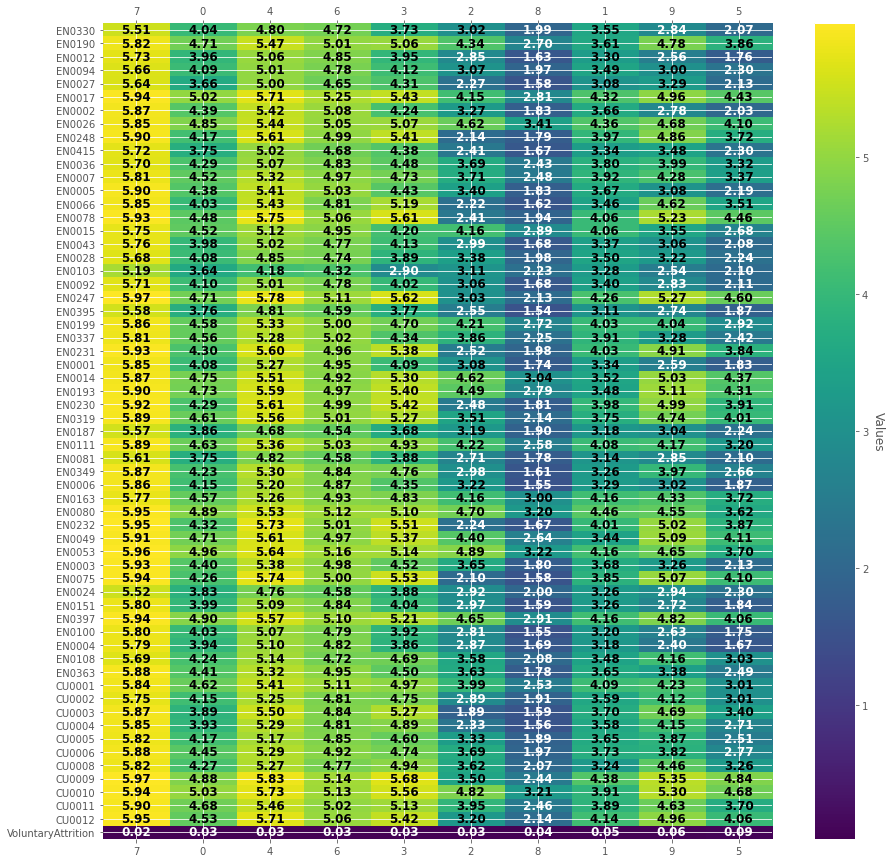

In [34]:
# heatmap ny varable, cluster, and normalized mean value
kmeans.plot_means_heatmap(figsize=(15,15), annot=True, scale_rows=False, valfmt='{x:.2f}')

* **This is an eye chart but there are some simple steps to follow to draw useful insights from this. First some background.**
    - Columns = 10 groups of employees (grouped based on response to questions)
    - Rows = 60 individual questions
    - Value = Mean Score given by the employees in that group to each question (Don’t be tempted to look at the numbers in detail yet… wait for #2 below)
    - The groups of employees (columns) are ordered. The left most group has the lowest attrition (last row indicates the % of attrition in the group). The right most group has the highest attrition.
* **There is a very simple way to get insights from this chart** 
    - Yellow/Green background OR Black Text implies High Scores
    - Purple/Blue background OR White Text implies Low Scores

* **To figure out the most important questions that could be useful in identifying attrition**
    - Groups that answer all questions as high are not useful to answer this question
    - Groups that answer all questions as low are also not useful to answer this question
    - Instead, look at the text colors of the 2 left most groups (columns) and the 2 right most groups (columns)
    - The questions where the left most groups have a black text and the right most groups have a white text are the ones that were scored very differently by the groups having low and high attrition. These questions may contain important clues as to what is important enough to affect attrition.
    
### Differences are related to Non Monetary Topics such as Engagement and Career Opportunities 
(this last piece of analysis was done outside of this notebook)